In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.3 MB 9.7 MB/s eta 0:00:01
   -------------------------- ------------- 5.5/8.3 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 15.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   -------------- ------------------------- 2.6/7.2 MB 19.4 MB/s eta 0:00:01
   ---------------- ----------------------- 2.9/7.2 MB 13.6 MB/s eta 0:00:01
   ------------------------------ --------- 5.5/7.2 MB 8.7 MB/s eta 0:00:01
   ------------------------------------- -- 6.8/7.2 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 7.9 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyp


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = 'events.json'

try:
    # Загружаем JSON. Если корневой элемент - объект с ключом 'events',
    # то read_json может создать DataFrame с одним столбцом 'events'.
    # В этом случае нам нужно "развернуть" этот столбец.
    temp_df = pd.read_json(file_path)

    # Проверяем, есть ли столбец 'events' и если да, то разворачиваем его
    if 'events' in temp_df.columns:
        # pd.json_normalize() идеально подходит для "разворачивания" вложенных JSON-данных
        df = pd.json_normalize(temp_df['events'])
        print("Данные успешно загружены и нормализованы из столбца 'events'.")
    else:
        # Если столбца 'events' нет, значит, JSON был плоским списком,
        # и temp_df уже является нужным DataFrame.
        df = temp_df
        print("Данные успешно загружены в DataFrame.")

    print("\nПервые 5 строк DataFrame:")
    print(df.head())

    print("\nДоступные столбцы в нормализованном DataFrame:")
    print(df.columns) # Теперь здесь должен быть 'signature' или другое имя поля события

    # Изучение распределения событий по их типам (по полю «signature»)
    # Убедитесь, что 'signature' теперь присутствует в df.columns
    if 'signature' in df.columns:
        event_type_distribution = df['signature'].value_counts()
        print("\nРаспределение типов событий информационной безопасности:")
        print(event_type_distribution)
    else:
        print("\nОшибка: Столбец 'signature' не найден после нормализации.")
        print("Пожалуйста, проверьте имя поля типа события в вашем JSON-файле.")
        exit()


except Exception as e:
    print(f"Произошла ошибка при загрузке или анализе данных: {e}")
    exit()


Данные успешно загружены и нормализованы из столбца 'events'.

Первые 5 строк DataFrame:
             timestamp                                          signature
0  2023-08-21T08:00:00  MALWARE-CNC Win.Trojan.Jadtre variant outbound...
1  2023-08-21T09:00:00  EXPLOIT Remote Windows Win32k elevation of pri...
2  2023-08-21T10:00:00            EXPLOIT Java JRE to Oracle WebLogic RCE
3  2023-08-21T11:00:00          NETBIOS DCERPC NCACN-IP-TCP interfaces BO
4  2023-08-21T12:00:00  MALWARE-CNC User-Agent known malicious connect...

Доступные столбцы в нормализованном DataFrame:
Index(['timestamp', 'signature'], dtype='object')

Распределение типов событий информационной безопасности:
signature
MALWARE-CNC Win.Trojan.Jadtre variant outbound connection       12
EXPLOIT Remote Windows Win32k elevation of privilege attempt    11
EXPLOIT Java JRE to Oracle WebLogic RCE                         11
NETBIOS DCERPC NCACN-IP-TCP interfaces BO                       11
MALWARE-CNC User-Agent known mali

C:\Users\iramu\AppData\Local\Temp\ipykernel_23064\971738883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_type_distribution.index, y=event_type_distribution.values, palette='viridis')


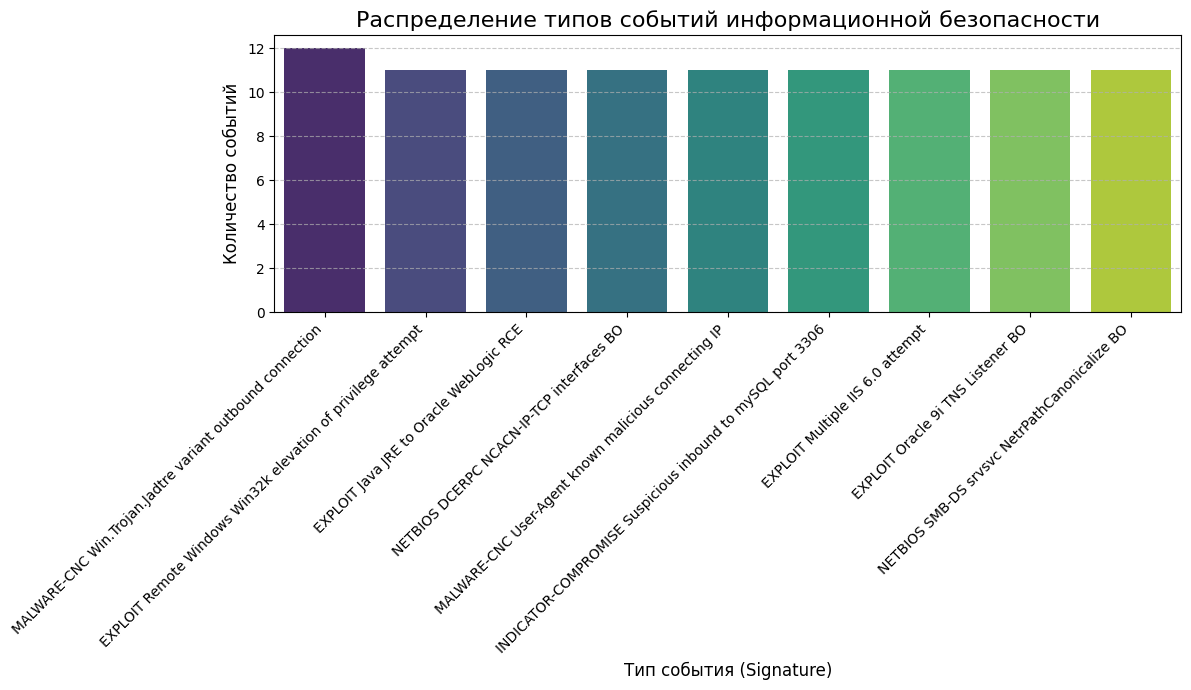


Программа успешно выполнена.
График распределения типов событий отображен.


In [9]:
plt.figure(figsize=(12, 7))
sns.barplot(x=event_type_distribution.index, y=event_type_distribution.values, palette='viridis')
plt.title('Распределение типов событий информационной безопасности', fontsize=16)
plt.xlabel('Тип события (Signature)', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nПрограмма успешно выполнена.")
print("График распределения типов событий отображен.")

In [10]:
print("\n--- Чек-лист самопроверки ---")
print("1. Установлены библиотеки Pandas, Matplotlib, Seaborn: Да (предполагается)")
print(f"2. Данные из файла JSON загружены в датафрейм с помощью Pandas: Да (файл '{file_path}')")
print("3. События информационной безопасности проанализированы по их типам (по полю «signature»): Да")
print("4. С помощью библиотеки Seaborn или Matplotlib построен график распределения типов событий информационной безопасности: Да")
print("\nПожалуйста, убедитесь, что вы также выполнили следующие шаги:")
print("- Сверили выполнение задания с примером (если есть).")
print("- Прикрепили ссылку на репозиторий с кодом в личном кабинете.")
print("- Название ветки репозитория содержит фамилию и имя студента, номер домашнего задания.")


--- Чек-лист самопроверки ---
1. Установлены библиотеки Pandas, Matplotlib, Seaborn: Да (предполагается)
2. Данные из файла JSON загружены в датафрейм с помощью Pandas: Да (файл 'events.json')
3. События информационной безопасности проанализированы по их типам (по полю «signature»): Да
4. С помощью библиотеки Seaborn или Matplotlib построен график распределения типов событий информационной безопасности: Да

Пожалуйста, убедитесь, что вы также выполнили следующие шаги:
- Сверили выполнение задания с примером (если есть).
- Прикрепили ссылку на репозиторий с кодом в личном кабинете.
- Название ветки репозитория содержит фамилию и имя студента, номер домашнего задания.
